Задание 1

Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
- оценка 2 и меньше - низкий рейтинг
- оценка 4 и меньше - средний рейтинг
- оценка 4.5 и 5 - высокий рейтинг

Результат классификации запишите в столбец class

In [1]:
import pandas as pd

In [2]:
data_1 = pd.read_csv('ratings.csv')
data_2 = pd.read_csv('links.csv')
data_3 = pd.read_csv('movies.csv')
data_4 = pd.read_csv('tags.csv')

In [3]:
data_1

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [8]:
def class_of_rating(row):
    rate = ' '
    if row['rating'] <= 2:
        rate = 'low'
    elif 2 < row['rating'] <= 4.5:
        rate = 'medium'
    elif row['rating'] >= 4.5:
        rate = 'high'
    return pd.Series(rate)    

In [9]:
data_1['class'] = data_1.apply(class_of_rating, axis=1)

In [10]:
data_1

,userId,movieId,rating,timestamp,class
0,1,1,4.0,964982703,medium
1,1,3,4.0,964981247,medium
2,1,6,4.0,964982224,medium
3,1,47,5.0,964983815,high
4,1,50,5.0,964982931,high
...,...,...,...,...,...
100831,610,166534,4.0,1493848402,medium
100832,610,168248,5.0,1493850091,high
100833,610,168250,5.0,1494273047,high
100834,610,168252,5.0,1493846352,high


In [ ]:
# Константин, почему последние верхние две строчки (№9 и 10) очень долго загружались? это разве нормально? секунд 45 где-то )))

In [14]:
data_1.head()

,userId,movieId,rating,timestamp,class
0,1,1,4.0,964982703,medium
1,1,3,4.0,964981247,medium
2,1,6,4.0,964982224,medium
3,1,47,5.0,964983815,high
4,1,50,5.0,964982931,high


In [15]:
data_1['class'].value_counts()

medium    74102
low       13523
high      13211
Name: class, dtype: int64

Задание 2

Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = {

'Центр': ['москва', 'тула', 'ярославль'],

'Северо-Запад': ['петербург', 'псков', 'мурманск'],

'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

Результат классификации запишите в отдельный столбец region.

In [16]:
geo_data = {

'Центр': ['москва', 'тула', 'ярославль'],

'Северо-Запад': ['петербург', 'псков', 'мурманск'],

'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск'] }

In [19]:
list(geo_data.keys())[1]

'Северо-Запад'

In [20]:
geo_data.values()

dict_values([['москва', 'тула', 'ярославль'], ['петербург', 'псков', 'мурманск'], ['владивосток', 'сахалин', 'хабаровск']])

In [23]:
list(geo_data.values())[1]

['петербург', 'псков', 'мурманск']

In [24]:
df = pd.read_csv('keywords.csv')

In [25]:
df.head()

,keyword,shows
0,вк,64292779
1,одноклассники,63810309
2,порно,41747114
3,ютуб,39995567
4,вконтакте,21014195


In [26]:
def find_region(row, geo_data):
    if (list(geo_data.values())[0][0] in row['keyword']) | (list(geo_data.values())[0][1] in row['keyword']) | (list(geo_data.values())[0][2] in row['keyword']):
        region = list(geo_data.keys())[0]
    elif (list(geo_data.values())[1][0] in row['keyword']) | (list(geo_data.values())[1][1] in row['keyword']) | (list(geo_data.values())[1][2] in row['keyword']):
        region = list(geo_data.keys())[1]
    elif (list(geo_data.values())[2][0] in row['keyword']) | (list(geo_data.values())[2][1] in row['keyword']) | (list(geo_data.values())[2][2] in row['keyword']):
        region = list(geo_data.keys())[2]
    else:
        region = 'undefined'
    return pd.Series(region)

In [27]:
df['region'] = df.apply(find_region, geo_data = geo_data, axis=1)

In [28]:
df.head()

,keyword,shows,region
0,вк,64292779,undefined
1,одноклассники,63810309,undefined
2,порно,41747114,undefined
3,ютуб,39995567,undefined
4,вконтакте,21014195,undefined


In [29]:
df.region.value_counts()

undefined         99253
Центр               387
Северо-Запад        266
Дальний Восток       94
Name: region, dtype: int64

Задание 3 (бонусное)

Есть мнение, что “раньше снимали настоящее кино, не то что сейчас”. Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия (файл ratings.csv из базы https://grouplens.org/datasets/movielens). Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

1. В переменную years запишите список из всех годов с 1950 по 2010.

2. Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:

            - для каждой строки пройдите по всем годам списка years
            - если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
            - если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год
3. Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’

4. Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга

Важно! При копировании юпитер ноутбука изменяет кавычки ’ на ` , что может способствовать ошибки в коде. В данной ситуации необходимо их просто заменить.

In [32]:
rating = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

In [39]:
rating

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [40]:
movies

,movieId,title,genres,years
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1900
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1900
9739,193585,Flint (2017),Drama,1900
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1900


In [41]:
# part 1:
years = list(range(1950, 2010))
years

[1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009]

In [42]:
# part 2:
def production_year(row, years):
    out = ' '
    find = False
    for year in years:
        if str(year) in row['title']:
            out = str(year)
            find = True
    if find == True:
        return pd.Series(out)
    else:
        return pd.Series(1900)

In [43]:
movies['years'] = movies.apply(production_year, years=years, axis=1)

In [44]:
movies

,movieId,title,genres,years
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1900
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1900
9739,193585,Flint (2017),Drama,1900
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1900


In [48]:
rating

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [63]:
# считаем среднее .mean:
movieId_mean_rating = rating.groupby('movieId').agg('mean')['rating'].reset_index()

In [52]:
movieId_mean_rating

,movieId,rating
0,1,3.920930
1,2,3.431818
2,3,3.259615
3,4,2.357143
4,5,3.071429
...,...,...
9719,193581,4.000000
9720,193583,3.500000
9721,193585,3.500000
9722,193587,3.500000


In [53]:
movieId_mean_rating.head()

,movieId,rating
0,1,3.920930
1,2,3.431818
2,3,3.259615
3,4,2.357143
4,5,3.071429


In [59]:
movieId_mean_rating.groupby('movieId').agg('mean').sort_values('rating', ascending=True)['rating']

movieId
26696     0.5
3604      0.5
7312      0.5
145724    0.5
76030     0.5
         ... 
3851      5.0
128087    5.0
33138     5.0
96608     5.0
53355     5.0
Name: rating, Length: 9724, dtype: float64

In [71]:
movie_joined = movies.merge(movieId_mean_rating)

In [72]:
movie_joined

,movieId,title,genres,years,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.357143
4,5,Father of the Bride Part II (1995),Comedy,1995,3.071429
...,...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1900,4.000000
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1900,3.500000
9721,193585,Flint (2017),Drama,1900,3.500000
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1900,3.500000


In [89]:
movie_joined.groupby('title').agg('mean').sort_values('rating', ascending=False)

,movieId,rating
title,,
Red Sorghum (Hong gao liang) (1987),2972.0,5.0
Boy Eats Girl (2005),69211.0,5.0
Maniac Cop 2 (1990),100906.0,5.0
Bloodsucking Bastards (2015),141928.0,5.0
Blue Planet II (2017),179135.0,5.0
...,...,...
"Haunted House 2, A (2014)",110773.0,0.5
Ben-hur (2016),122888.0,0.5
Begotten (1990),26717.0,0.5


In [98]:
# считаем количество фильмов по рейтингу:
movie_joined['rating'].value_counts().head(10)

4.00    1010
3.00     917
3.50     912
2.50     521
2.00     443
4.50     375
5.00     296
3.75     224
1.50     215
3.25     205
Name: rating, dtype: int64

In [106]:
# визуализируем (для интереса и закрепления):
%matplotlib inline

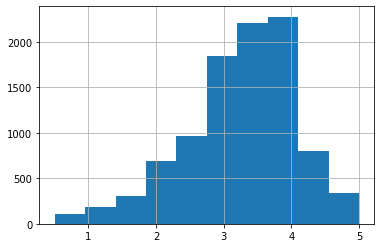

In [107]:
movie_joined['rating'].hist()

In [ ]:
movie_joined['rating'].hist(bins=70)

In [ ]:
# Константин, а как теперь этот график можно перенести в PowerBI или PowerPoint? Спасибо 